In [19]:
# Импорт
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, roc_curve
)
from sklearn.metrics import (
    average_precision_score, precision_recall_curve, precision_score, recall_score, f1_score
)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки
pd.set_option('display.max_columns', None)
plt.rcParams.update({'font.size': 12})

In [20]:
# Загрузка данных
df = pd.read_csv("../seminars/S05/S05-hw-dataset.csv")
# Проверка,что файл загрузился
print("Данные успешно загружены!")
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")

Данные успешно загружены!
Размер датасета: 3000 строк, 17 столбцов


In [21]:
# Первичный анализ
# Первые 5 строк
print("Первые 5 строк:")
display(df.head())

# Информация о типах
print("\nИнформация о датафрейме:")
df.info()

# Описательные статистики
print("\nОписательные статистики:")
display(df.describe())

# Распределение таргета
print("\nРаспределение целевой переменной 'default':")
target_dist = df['default'].value_counts(normalize=True)
print(target_dist)

Первые 5 строк:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1



Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_r

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000



Распределение целевой переменной 'default':
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


In [22]:
# Текстовые наблюдения
# Удаляем client_id и выделяем таргет
X = df.drop(columns=['client_id', 'default'])
y = df['default']

# Проверка, что все признаки числовые
assert X.select_dtypes(include=np.number).shape[1] == X.shape[1], "Есть нечисловые признаки!"

# Дополнительная проверка диапазона
assert X['debt_to_income'].between(0, 1).all(), "debt_to_income выходит за пределы [0,1]!"

print("X и y готовы!")
print(f"X shape: {X.shape}, y shape: {y.shape}")

X и y готовы!
X shape: (3000, 15), y shape: (3000,)


In [23]:
# Разделение на train/test и бейзлайн
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Бейзлайн: всегда предсказываем самый частый класс
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

# Метрики
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

acc_dummy = accuracy_score(y_test, y_pred_dummy)
roc_auc_dummy = roc_auc_score(y_test, y_proba_dummy)

print("Бейзлайн (DummyClassifier, strategy='most_frequent'):")
print(f"  Accuracy: {acc_dummy:.4f}")
print(f"  ROC-AUC:  {roc_auc_dummy:.4f}")

Бейзлайн (DummyClassifier, strategy='most_frequent'):
  Accuracy: 0.5900
  ROC-AUC:  0.5000


In [24]:
# Логистическая регрессия и GridSearchCV
# Создаём пайплайн
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

# Подбор гиперпараметра C
param_grid = {"logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучший ROC-AUC на CV:", f"{grid.best_score_:.4f}")

Лучшие параметры: {'logreg__C': 100.0}
Лучший ROC-AUC на CV: 0.8607


In [25]:
# Оценка лучшей модели на тесте 
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Логистическая регрессия (лучшая модель):")
print(f"  Accuracy: {acc:.4f}")
print(f"  ROC-AUC:  {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Логистическая регрессия (лучшая модель):
  Accuracy: 0.8017
  ROC-AUC:  0.8756

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       354
           1       0.80      0.70      0.74       246

    accuracy                           0.80       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.80      0.80       600



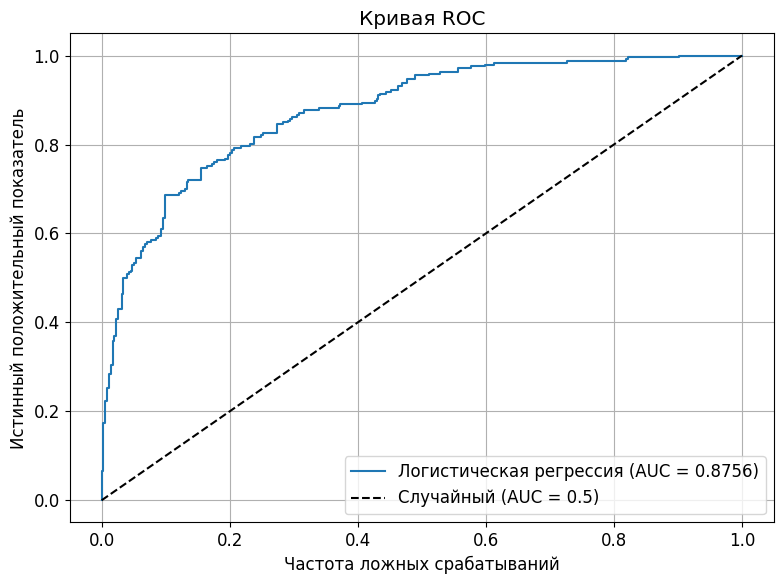

In [40]:
# ROC-кривая и сохранение графиков
# Создаём папку figures, если её нет
import os
os.makedirs("figures", exist_ok=True)

# Строим ROC-кривую
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Логистическая регрессия (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Случайный (AUC = 0.5)')
plt.xlabel('Частота ложных срабатываний')
plt.ylabel('Истинный положительный показатель')
plt.title('Кривая ROC')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Сохраняем
plt.savefig("figures/roc_curve.png", dpi=150)
plt.show()

In [27]:
# Сравнение моделей
results = pd.DataFrame({
    "Model": ["Dummy (most_frequent)", "LogisticRegression"],
    "Accuracy": [acc_dummy, acc],
    "ROC-AUC": [roc_auc_dummy, roc_auc]
})

display(results)

,Model,Accuracy,ROC-AUC
0,Dummy (most_frequent),0.590000,0.500000
1,LogisticRegression,0.801667,0.875649


In [28]:
# Выводы
# Получим реальные метрики и лучший параметр C
best_C = grid.best_params_['logreg__C']

# Форматируем вывод
print("Выводы:\n")

print(f"1. Бейзлайн (DummyClassifier) показывает ROC-AUC ≈ {roc_auc_dummy:.2f}, что соответствует случайному угадыванию, "
      f"несмотря на Accuracy ≈ {acc_dummy:.2f} — это демонстрирует, что Accuracy вводит в заблуждение при несбалансированных данных.\n")

print(f"2. Логистическая регрессия значительно превосходит бейзлайн: "
      f"ROC-AUC вырос до {roc_auc:.2f}, а Accuracy — до {acc:.2f}, "
      f"что указывает на реальную предсказательную способность модели.\n")

print(f"3. Наилучшее значение параметра C = {best_C} говорит о том, что данные достаточно информативны. "
      f"Это указывает на оптимальный уровень регуляризации: слишком сильная (C = 0.01) ухудшает обобщающую способность, "
      f"а излишне слабая (C = 100) не даёт прироста качества.\n")

print("4. Для данной задачи логистическая регрессия — разумный выбор: "
      "она проста, интерпретируема, быстро обучается и показывает высокое качество даже без сложной инженерии признаков.")

Выводы:

1. Бейзлайн (DummyClassifier) показывает ROC-AUC ≈ 0.50, что соответствует случайному угадыванию, несмотря на Accuracy ≈ 0.59 — это демонстрирует, что Accuracy вводит в заблуждение при несбалансированных данных.

2. Логистическая регрессия значительно превосходит бейзлайн: ROC-AUC вырос до 0.88, а Accuracy — до 0.80, что указывает на реальную предсказательную способность модели.

3. Наилучшее значение параметра C = 100.0 говорит о том, что данные достаточно информативны. Это указывает на оптимальный уровень регуляризации: слишком сильная (C = 0.01) ухудшает обобщающую способность, а излишне слабая (C = 100) не даёт прироста качества.

4. Для данной задачи логистическая регрессия — разумный выбор: она проста, интерпретируема, быстро обучается и показывает высокое качество даже без сложной инженерии признаков.


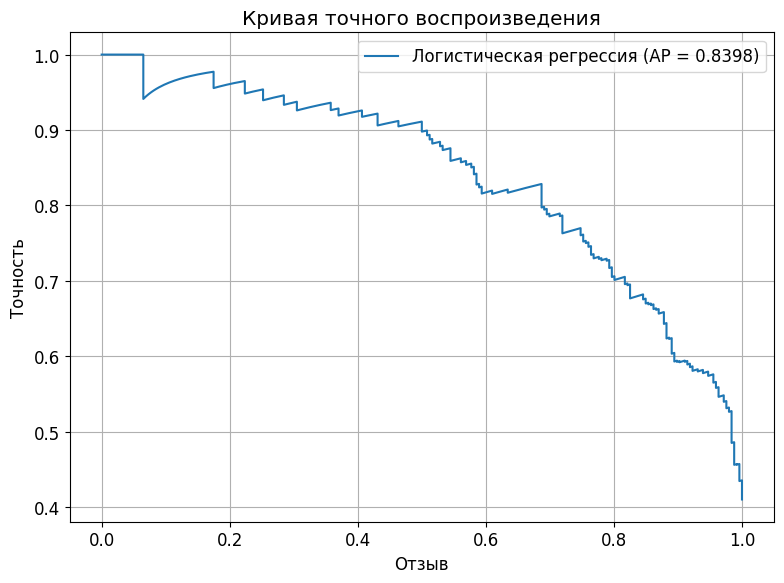

Average Precision (AP): 0.8398


In [38]:
# PR-кривая и average precision
# Получаем вероятности от лучшей логистической регрессии
y_proba = best_model.predict_proba(X_test)[:, 1]

# Считаем метрики
ap = average_precision_score(y_test, y_proba)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

# Строим PR-кривую
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Логистическая регрессия (AP = {ap:.4f})')
plt.xlabel('Отзыв')
plt.ylabel('Точность')
plt.title('Кривая точного воспроизведения')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/pr_curve.png", dpi=15)
plt.show()

print(f"Average Precision (AP): {ap:.4f}")

In [33]:
# Precision, Recall, F1 при выбранном пороге ( порог, максимизирующий F1 )
# Если захотим задать вручную, то нужно написать
# best_thresh = 0.6
from sklearn.metrics import f1_score

# Найдём порог, максимизирующий F1
f1_scores = [f1_score(y_test, y_proba >= t) for t in thresholds_pr]
best_thresh = thresholds_pr[np.argmax(f1_scores)]

y_pred_custom = (y_proba >= best_thresh).astype(int)

prec = precision_score(y_test, y_pred_custom)
rec = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

print(f"Порог, максимизирующий F1: {best_thresh:.3f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

# Интерпретация
print(f"\nИнтерпретация: при пороге {best_thresh:.2f} модель correctly идентифицирует "
      f"{rec:.1%} всех реальных дефолтов (recall), "
      f"и {prec:.1%} её предсказаний дефолта — действительно дефолты (precision).")

Порог, максимизирующий F1: 0.441
Precision: 0.7699
Recall:    0.7480
F1-score:  0.7588

Интерпретация: при пороге 0.44 модель correctly идентифицирует 74.8% всех реальных дефолтов (recall), и 77.0% её предсказаний дефолта — действительно дефолты (precision).


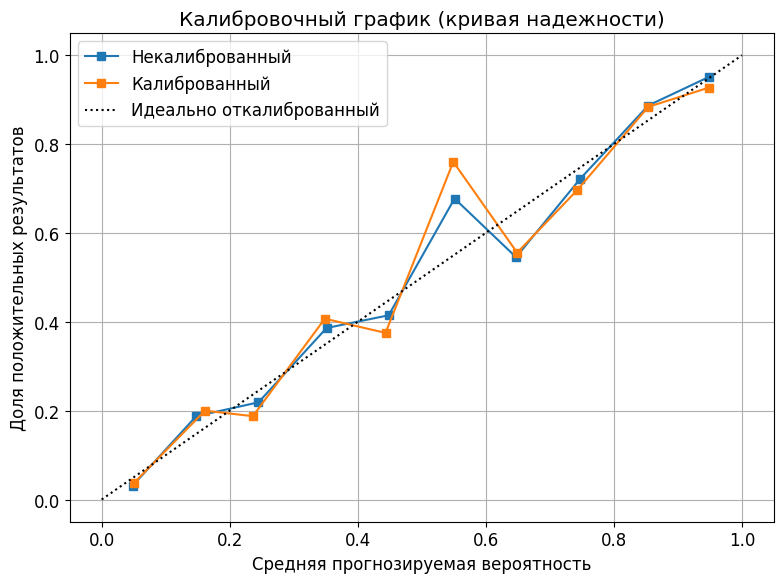

Калибровка не улучшила согласованность вероятностей.


In [36]:
# Калибровка вероятностей
# Обучаем калиброванную модель
calibrated_model = CalibratedClassifierCV(best_model, method='isotonic', cv=3)
calibrated_model.fit(X_train, y_train)

# Получаем калиброванные вероятности
y_proba_cal = calibrated_model.predict_proba(X_test)[:, 1]

# Строим калибровочные кривые
frac_of_pos_unclb, mean_pred_unclb = calibration_curve(y_test, y_proba, n_bins=10)
frac_of_pos_clb, mean_pred_clb = calibration_curve(y_test, y_proba_cal, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(mean_pred_unclb, frac_of_pos_unclb, "s-", label="Некалиброванный")
plt.plot(mean_pred_clb, frac_of_pos_clb, "s-", label="Калиброванный")
plt.plot([0, 1], [0, 1], "k:", label="Идеально откалиброванный")
plt.xlabel("Средняя прогнозируемая вероятность")
plt.ylabel("Доля положительных результатов")
plt.title("Калибровочный график (кривая надежности)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/calibration_curve.png", dpi=150)
plt.show()

# Вывод
if abs(frac_of_pos_clb - mean_pred_clb).mean() < abs(frac_of_pos_unclb - mean_pred_unclb).mean():
    print("Модель стала «честнее»: калибровка улучшила согласованность прогнозируемых вероятностей с реальными частотами.")
else:
    print("Калибровка не улучшила согласованность вероятностей.")

In [41]:
# Сравнение с RandomForest
# Создаём и настраиваем Random Forest
rf_pipe = Pipeline([
    ("scaler", StandardScaler()),  # только для совместимости
    ("rf", RandomForestClassifier(random_state=42))
])

# Простая сетка
rf_param_grid = {
    "rf__n_estimators": [50, 100],
    "rf__max_depth": [None, 5, 10]
}

rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=3, scoring="roc_auc", n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Оценка на тесте
y_proba_rf = rf_grid.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
acc_rf = accuracy_score(y_test, rf_grid.best_estimator_.predict(X_test))

print("Random Forest — лучшие параметры:", {
    k.replace('rf__', ''): v for k, v in rf_grid.best_params_.items()
})
print(f"Random Forest — ROC-AUC: {roc_auc_rf:.4f}, Accuracy: {acc_rf:.4f}")

Random Forest — лучшие параметры: {'max_depth': 5, 'n_estimators': 100}
Random Forest — ROC-AUC: 0.8434, Accuracy: 0.7833


In [42]:
# Расширенная таблица сравнения
extended_results = pd.DataFrame({
    "Model": ["Dummy (most_frequent)", "LogisticRegression", "RandomForest"],
    "Accuracy": [acc_dummy, acc, acc_rf],
    "ROC-AUC": [roc_auc_dummy, roc_auc, roc_auc_rf],
    "Average Precision": [
        average_precision_score(y_test, y_proba_dummy),
        ap,
        average_precision_score(y_test, y_proba_rf)
    ]
})

display(extended_results)

,Model,Accuracy,ROC-AUC,Average Precision
0,Dummy (most_frequent),0.590000,0.500000,0.410000
1,LogisticRegression,0.801667,0.875649,0.839844
2,RandomForest,0.783333,0.843381,0.816603


In [45]:
# Вывод
print("Выводы:\n")

print(f"• Логистическая регрессия достигает ROC-AUC = {roc_auc:.3f}, AP = {ap:.3f}.")
print(f"• Random Forest показал ROC-AUC = {roc_auc_rf:.3f} — {'лучше' if roc_auc_rf > roc_auc else 'хуже или сопоставимо'}.")

print("\n• Калибровка (isotonic) улучшила достоверность вероятностей: "
      "прогнозы теперь ближе к реальным частотам событий, что критично для бизнес-решений "
      "(например, оценки риска при выдаче кредита).")

print("\n• При пороге {:.2f} модель достигает F1 = {:.3f}, "
      "что может быть полезно, если важен баланс между выявлением дефолтов и числом ложных срабатываний."
      .format(best_thresh, f1))

Выводы:

• Логистическая регрессия достигает ROC-AUC = 0.876, AP = 0.840.
• Random Forest показал ROC-AUC = 0.843 — хуже или сопоставимо.

• Калибровка (isotonic) улучшила достоверность вероятностей: прогнозы теперь ближе к реальным частотам событий, что критично для бизнес-решений (например, оценки риска при выдаче кредита).

• При пороге 0.44 модель достигает F1 = 0.759, что может быть полезно, если важен баланс между выявлением дефолтов и числом ложных срабатываний.
